In [84]:
from pathlib import Path
import numpy as np
from datetime import datetime
import xarray as xr

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib as mpl
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.patches as mpatch
from matplotlib.transforms import offset_copy
import matplotlib.colors as colors
from cartopy.io import shapereader
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import matplotlib.patches as mpatches
import pandas as pd
import glob

from statsmodels.tsa.seasonal import seasonal_decompose

import gdal
import cmocean
import cmaps

from matplotlib import style
style.use('fivethirtyeight')

%matplotlib inline

In [38]:
ds = xr.open_mfdataset('C:/Users/panmits86/Desktop/Python/data/Wind/CERSAT-GLO-BLENDED_WIND_L4_REP-V6-OBS_FULL_TIME_SERIE_1591368942032.nc')
ds

<ipython-input-38-81203b1c7544>:1: FutureWarning: In xarray version 0.15 the default behaviour of `open_mfdataset`
will change. To retain the existing behavior, pass
combine='nested'. To use future default behavior, pass
combine='by_coords'. See
http://xarray.pydata.org/en/stable/combining.html#combining-multi

  ds = xr.open_mfdataset('C:/Users/panmits86/Desktop/Python/data/Wind/CERSAT-GLO-BLENDED_WIND_L4_REP-V6-OBS_FULL_TIME_SERIE_1591368942032.nc')
C:\Users\panmits86\Anaconda3\envs\thesis\lib\site-packages\xarray\backends\api.py:934: FutureWarning: The datasets supplied have global dimension coordinates. You may want
to use the new `combine_by_coords` function (or the
`combine='by_coords'` option to `open_mfdataset`) to order the datasets
before concatenation. Alternatively, to continue concatenating based
on the order the datasets are supplied in future, please use the new
`combine_nested` function (or the `combine='nested'` option to
open_mfdataset).
  combined = auto_combine(


<xarray.Dataset>
Dimensions:         (lat: 9, lon: 17, time: 36558)
Coordinates:
  * lon             (lon) float32 -73.9375 -73.6875 ... -70.1875 -69.9375
  * time            (time) datetime64[ns] 1992-01-01T06:00:00 ... 2018-12-31T18:00:00
  * lat             (lat) float32 40.0625 40.3125 40.5625 ... 41.8125 42.0625
Data variables:
    wind_speed_rms  (time, lat, lon) float64 dask.array<chunksize=(36558, 9, 17), meta=np.ndarray>
    wind_speed      (time, lat, lon) float64 dask.array<chunksize=(36558, 9, 17), meta=np.ndarray>
Attributes:
    Conventions:                                    CF-1.7, ACDD-1.3, ISO 8601
    FROM_ORIGINAL_FILE__netcdf_version_id:          4.6.1 of Sep  8 2018 17:2...
    date_created:                                   2019-04-10T22:23:38
    date_modified:                                  2019-04-10T22:23:38
    id:                                             WIND_GLO_WIND_L4_REP_OBSE...
    naming_authority:                               fr.ifremer.cersat
    FROM_ORIGINAL_FILE__Metadata_Conventions:       Unidata Dataset Discovery...
    standard_name_vocabulary:                       NetCDF Climate and Foreca...
    institution:                                    Institut Francais de Rech...
    institution_abbreviation:                       Ifremer/Cersat
    title:                                          Global Wind, L4 2007-2012...
    summary:                                        Multi-sensor blended wind...
    cdm_data_type:                                  grid
    keywords:                                       Oceans > Ocean Winds > Su...
    keywords_vocabulary:                            NASA Global Change Master...
    project:                                        Copernicus - Marine envir...
    acknowledgment:                                 Please acknowledge the us...
    license:                                        These data are available ...
    format_version:                                 v1.0
    processing_software:                            Ifremer blended wind REP ...
    FROM_ORIGINAL_FILE__product_version:             1.0
    uuid:                                           cda3a0a8-a124-4776-a0f3-6...
    processing_level:                               L4
    history:                                        Analysis originally produ...
    publisher_name:                                 CMEMS
    publisher_url:                                  marine.copernicus.eu
    publisher_email:                                servicedesk.cmems@mercato...
    creator_name:                                   CERSAT
    creator_url:                                    http://cersat.ifremer.fr
    creator_email:                                  cersat@ifremer.fr
    references:                                     Product User Manual for W...
    metadata_link:                                  
    source:                                         Ifremer blended wind REP ...
    source_version:                                 6.0
    FROM_ORIGINAL_FILE__platform:                   Scatsat-1 HY-2A OCEANSAT-...
    FROM_ORIGINAL_FILE__platform_type:              low_earth_orbit_satellite...
    instrument:                                     Scatsat-1 SCAT OCEANSAT-2...
    instrument_type:                                scatterometer scatteromet...
    FROM_ORIGINAL_FILE__geospatial_lat_min:         -79.9375
    FROM_ORIGINAL_FILE__geospatial_lat_max:         80.0625
    FROM_ORIGINAL_FILE__geospatial_lat_units:       degrees_north
    FROM_ORIGINAL_FILE__geospatial_lat_resolution:  0.25
    FROM_ORIGINAL_FILE__geospatial_lon_min:         -179.9375
    FROM_ORIGINAL_FILE__geospatial_lon_max:         179.8125
    FROM_ORIGINAL_FILE__geospatial_lon_units:       degrees_east
    FROM_ORIGINAL_FILE__geospatial_lon_resolution:  0.25
    geospatial_vertical_min:                        10.0
    geospatial_vertical_max:                        10.0
    geospatial_vertical_units:        

In [16]:
def make_map(projection=ccrs.PlateCarree()):
    fig, ax = plt.subplots(figsize=(15, 20),
                           subplot_kw=dict(projection=projection))
    gl = ax.gridlines(draw_labels=True, linestyle='--')
    gl.xlabels_top = False
    gl.xlocator = mticker.FixedLocator([-74, -73.5, -73, -72.5, -72, -71.5, -71, -70.5, -70])
    gl.ylocator = mticker.FixedLocator([40, 40.5, 41, 41.5, 42])
    gl.xformatter = LONGITUDE_FORMATTER
    gl.yformatter = LATITUDE_FORMATTER
    return fig, ax

Text(0.5, 1.0, '1992-01-14 06:00:00')

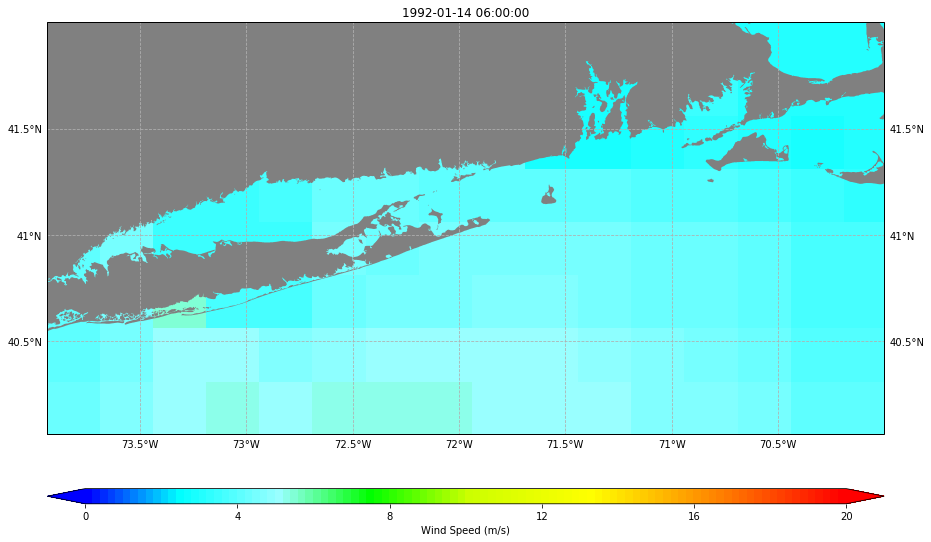

In [24]:
fig, ax = make_map(projection=ccrs.PlateCarree())
ax.set_extent([-73.9375, -70, 40.0625, 42])

shp = shapereader.Reader('C:/Users/panmits86/Desktop/Python/SNE_shapefile/GSHHS_f_L1_SNE.shp')
for record, geometry in zip(shp.records(), shp.geometries()):
    ax.add_geometries([geometry], ccrs.PlateCarree(), facecolor='gray')

# Add markers for the position of the satellite observations.
cmap=cmaps.BlAqGrYeOrRe
bounds = np.array([0,4,8,12,16,20])
#norm = colors.BoundaryNorm(boundaries=bounds, ncolors=10)
norm = mpl.colors.Normalize(vmin=0, vmax=20)
cs2 = plt.pcolormesh(ds['lon'], ds['lat'], ds['wind_speed'][50], cmap=cmap, norm=norm,
            transform=ccrs.PlateCarree(), shading='flat', snap=True)
cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,aspect=50)
out=fig.colorbar(cs2,cax=cax,ticks=bounds,extend='both',**kw)
out.set_label('Wind Speed (m/s)',size=10)
ax.set_title('1992-01-14 06:00:00')
#plt.savefig('SNE_obs_SA_Level2_valid.png', dpi=300, bbox_inches='tight')

In [55]:
ds1 = ds[['wind_speed']]

ds2 = ds1.reset_index(dims_or_levels=['time','lon','lat'])

ds3 = ds2.to_dataframe()

ds4 = ds3[(ds3['lon_'] < -71) & (ds3['lon_'] > -71.2) & (ds3['lat_'] < 41) & (ds3['lat_'] > 40.8)]

ds5 = ds4.set_index('time_')

ds5

,wind_speed,lon_,lat_
time_,,,
1992-01-01 06:00:00,2.320312,-71.1875,40.8125
1992-01-01 12:00:00,3.330078,-71.1875,40.8125
1992-01-01 18:00:00,3.879883,-71.1875,40.8125
1992-01-02 00:00:00,0.780273,-71.1875,40.8125
1992-01-02 06:00:00,2.530273,-71.1875,40.8125
...,...,...,...
2018-12-30 18:00:00,4.080078,-71.1875,40.8125
2018-12-31 00:00:00,4.129883,-71.1875,40.8125
2018-12-31 06:00:00,2.250000,-71.1875,40.8125


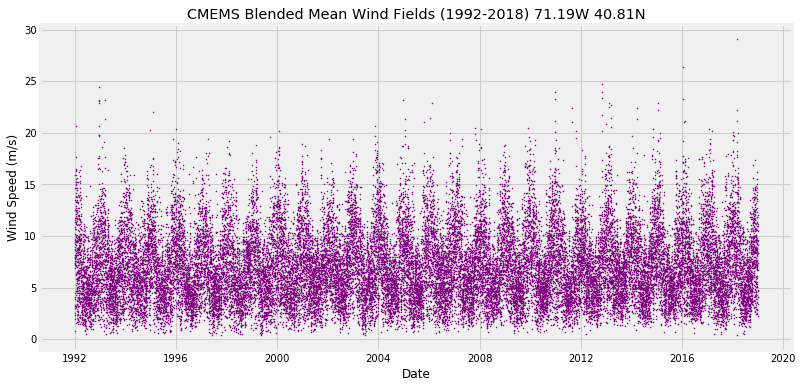

In [57]:
# plot time series of wave height and save figure
fig, ax = plt.subplots(figsize=(12, 6))
ax.scatter(ds4['time_'],ds4['wind_speed'],s=1,color='purple')
#ax.scatter(b44097_wave['Date'],b44097_wave['WVHT'],s=1,color='purple')
ax.set(xlabel="Date",
       ylabel="Wind Speed (m/s)",
       title="CMEMS Blended Mean Wind Fields (1992-2018) 71.19W 40.81N")

plt.savefig('CMEMS_wind', dpi=300)

In [92]:
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    fig, ax = plt.subplots(figsize=(12,6))
    
    ax.scatter(series.index, series, s=1)
    #ax.plot(series.index, series, linewidth=2)
    ax.set(xlabel="Date", ylabel="Wind Speed (m/s)")
    
    
    # min_periods=2880 (month for half-hourly observations) for seasonality
    rolling_mean_ia = series.rolling(window=1440,center=True,min_periods=5).mean()

    #plt.title("Moving average\n window size = {}".format(window),fontsize=14)
    plt.plot(rolling_mean_ia, "k", label="12-Month Running Mean",linewidth=2)
    plt.tick_params(axis='both', labelsize=10)
    ax.set(xlabel="Date", ylabel="Wind Speed (m/s)")
    
    
    # min_periods=2880 (month for half-hourly observations) for seasonality
    rolling_mean_s = series.rolling(window=window,center=True,min_periods=5).mean()

    #plt.title("Moving average\n window size = {}".format(window),fontsize=14)
    plt.plot(rolling_mean_s, "r", label="3-Month Running Mean",linewidth=2)
    plt.tick_params(axis='both', labelsize=10)
    ax.set(xlabel="Date", ylabel="Wind Speed (m/s)")
    
    plt.legend(loc="best")
    plt.grid(True)

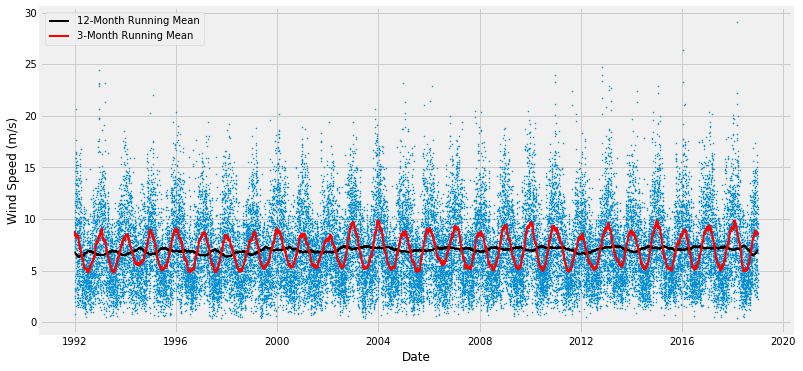

In [93]:
plotMovingAverage(ds5['wind_speed'], 360)